In [84]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from ipywidgets.widgets import Label, Layout, Button, Text 
import ipywidgets as ipywidgets
import numpy as np
import pandas as pd
import time

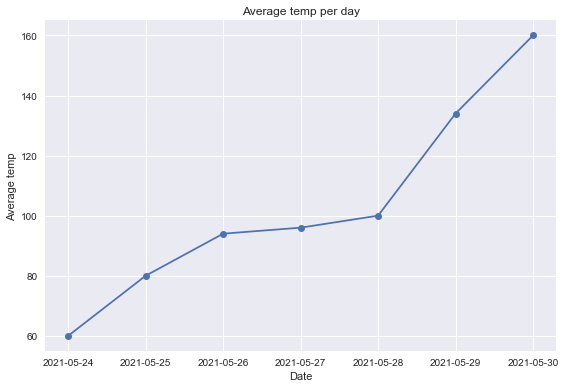

In [85]:
dates = [
        datetime(2021, 5, 24),
        datetime(2021, 5, 25),
        datetime(2021, 5, 26),
        datetime(2021, 5, 27),
        datetime(2021, 5, 28),
        datetime(2021, 5, 29),
        datetime(2021, 5, 30)
    ]

temps = [60, 80, 94, 96, 100, 134, 160]
temps2 = [62, 82, 96, 98, 102, 136, 162,166]

def plotAddGraph(timedates, avg_temps):
    #if(plotlist)
    plt.plot_date(timedates, avg_temps, linestyle = 'solid',label='lijn2')

plt.style.use('seaborn')

plt.gcf().autofmt_xdate()

# data = pd.read_csv('data.csv')
# price_date = data['Date']
# price_close = data['Close']

plt.title('Average temp per day')
plt.xlabel('Date')
plt.ylabel('Average temp')

plotAddGraph(dates,temps)

plt.tight_layout()

#plotlist = plt.plot[]




def showPlot():
    plotAddGraph(dates,temps)
    
    plt.show()
    
    
def closePlot():
    plt.close()

def plotGraph(timedates, avg_temps):

    plt.style.use('seaborn')

    plt.plot_date(timedates, avg_temps, linestyle = 'solid')

    plt.gcf().autofmt_xdate()

    plt.title("Average temp for device")
    plt.xlabel('Date')
    plt.ylabel('Average temp')

    plt.tight_layout()

    plt.show()


In [86]:
b_graph = Button(
    description='Graph',
    icon='stop',
    layout=Layout(width='100px')
)

b_home = Button(
    description='Home',
    icon='stop',
    layout=Layout(width='100px')
)

graphBox = ipywidgets.VBox(
    [
        b_home,
    ]
)

homeBox = ipywidgets.VBox(
    [
        b_graph,
    ]
)



In [87]:
masterBox = ipywidgets.VBox(
    [
        homeBox,
        
    ]
)

def goToGraph(b):
    closePlot(),
    masterBox.children =(graphBox),
    showPlot(),
    time.sleep(1),
    plotAddGraph(dates,temps2),
    print('show')
    

    
def goToHome(b):
    masterBox.children =(homeBox),
    closePlot(),
    print('close')

b_graph.on_click(goToGraph)
b_home.on_click(goToHome)



masterBox

In [88]:
Device_ID_Lenght = 10
data = pd.read_csv('Dummy_data.CSV')
data['Date'] = pd.to_datetime(data.Date)
data['Week'] = data.Date.dt.isocalendar().week
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
device_ID = ''

data_A = np.array([])
data_B = np.array([])
data_C = np.array([])
data_D = np.array([])
deviceID_A = ''
deviceID_B = ''
deviceID_C = ''
deviceID_D = ''
timedates_A = np.array([])
timedates_B = np.array([])
timedates_C = np.array([])
timedates_D = np.array([])

def addLine(timedates, avg_temps,device_ID):
    global data_A
    global data_B
    global data_C
    global data_D
    global deviceID_A
    global deviceID_B
    global deviceID_C
    global deviceID_D
    global timedates_A
    global timedates_B
    global timedates_C
    global timedates_D
    
    #Setting the incomming data in the correct variable
    if data_A.size == 0:
        data_A = avg_temps
        deviceID_A = device_ID
        timedates_A = timedates
    elif data_B.size == 0:
        data_B = avg_temps
        deviceID_B = device_ID
        timedates_B = timedates
    elif data_C.size == 0:
        data_C = avg_temps
        deviceID_C = device_ID
        timedates_C = timedates
    elif data_D.size == 0:
        data_D = avg_temps
        deviceID_D = device_ID
        timedates_D = timedates
    else:
        print('Cannot add more graphs')
    updatePlot()
    
    
def updatePlot():
    global data_A
    global data_B
    global data_C
    global data_D
    global deviceID_A
    global deviceID_B
    global deviceID_C
    global deviceID_D
    global timedates_A
    global timedates_B
    global timedates_C
    global timedates_D
    
    #Creating the plot
    if data_B.size != 0:
        if data_C.size != 0:
            #plot contains 3 or 4 graphs
            fig, ((graph_1,graph_3),(graph_2,graph_4)) = plt.subplots(2,2)
            if data_A.size != 0:
                graph_1.plot_date(timedates_A, data_A, linestyle = 'solid')
                graph_1.set_title(deviceID_A)
            if data_B.size != 0:
                graph_2.plot_date(timedates_B, data_B, linestyle = 'solid')
                graph_2.set_title(deviceID_B)
                graph_2.sharex(graph_1)
            if data_C.size != 0:
                graph_3.plot_date(timedates_C, data_C, linestyle = 'solid')
                graph_3.set_title(deviceID_C)
                #put in place here so dates will appear when there is only 3 graphs visable
                graph_4.sharex(graph_3)
            if data_D.size != 0:
                graph_4.plot_date(timedates_D, data_D, linestyle = 'solid')
                graph_4.set_title(deviceID_D)
        else:
            #plot contains 2 graphs
            fig, ((graph_1),(graph_2)) = plt.subplots(2,1)
            if data_A.size != 0:
                graph_1.plot_date(timedates_A, data_A, linestyle = 'solid')
                graph_1.set_title(deviceID_A)
            if data_B.size != 0:
                graph_2.plot_date(timedates_B, data_B, linestyle = 'solid')
                graph_2.set_title(deviceID_B)
    else:
        #plot only contains one graph
        fig, (graph_1) = plt.subplots(1,1)
        if data_A.size != 0:
            graph_1.plot_date(timedates_A, data_A, linestyle = 'solid')
            graph_1.set_title(deviceID_A)
    
    #Styling the plot
    fig.suptitle('Average temp')
    plt.style.use('seaborn')
    plt.gcf().autofmt_xdate()
    plt.tight_layout()
    #Showing the plot
    plt.draw()
    plt.show()

In [89]:
b_remove_graph1 = Button(
    description='Remove Graph 1',
    icon='warning',
    layout=Layout(width='200px'),
    button_style='danger'
)

b_remove_graph2 = Button(
    description='Remove Graph 2',
    icon='warning',
    layout=Layout(width='200px'),
    button_style='danger'
)

b_remove_graph3 = Button(
    description='Remove Graph 3',
    icon='warning',
    layout=Layout(width='200px'),
    button_style='danger'
)

b_remove_graph4 = Button(
    description='Remove Graph 4',
    icon='warning',
    layout=Layout(width='200px'),
    button_style='danger'
)

b_remove_all = Button(
    description='Remove all',
    icon='warning',
    layout=Layout(width='200px'),
    button_style='danger'
)

def removeGraphA(b):
    removeGraph('A')
    
def removeGraphB(b):
    removeGraph('B')
    
def removeGraphC(b):
    removeGraph('C')
    
def removeGraphD(b):
    removeGraph('D')

def removeGraphAll(b):
    removeGraph('X')

def removeGraph(graph):
    global data_A
    global data_B
    global data_C
    global data_D
    global deviceID_A
    global deviceID_B
    global deviceID_C
    global deviceID_D
    global timedates_A
    global timedates_B
    global timedates_C
    global timedates_D
    
    if graph == 'A':
        #Graph A getting removed
        data_A = data_B
        data_B = data_C
        data_C = data_D
        data_D = np.array([])
        deviceID_A = deviceID_B
        deviceID_B = deviceID_C
        deviceID_C = deviceID_D
        deviceID_D = ''
        timedates_A = timedates_B
        timedates_B = timedates_C
        timedates_C = timedates_D
        timedates_D = np.array([])
    elif graph == 'B':
        #Graph B getting removed
        data_B = data_C
        data_C = data_D
        data_D = np.array([])
        deviceID_B = deviceID_C
        deviceID_C = deviceID_D
        deviceID_D = ''
        timedates_B = timedates_C
        timedates_C = timedates_D
        timedates_D = np.array([])
    elif graph == 'C':
        #Graph C getting removed
        data_C = data_D
        data_D = np.array([])
        deviceID_C = deviceID_D
        deviceID_D = ''
        timedates_C = timedates_D
        timedates_D = np.array([])
    elif graph == 'D':
        #Graph D getting removed
        data_D = np.array([])
        deviceID_D = ''
        timedates_D = np.array([])
    elif graph == 'X':
        #All graphs getting removed
        data_A = np.array([])
        data_B = np.array([])
        data_C = np.array([])
        data_D = np.array([])
        deviceID_A = ''
        deviceID_B = ''
        deviceID_C = ''
        deviceID_D = ''
        timedates_A = np.array([])
        timedates_B = np.array([])
        timedates_C = np.array([])
        timedates_D = np.array([])       
    updatePlot()
        


b_remove_graph1.on_click(removeGraphA)
b_remove_graph2.on_click(removeGraphB)
b_remove_graph3.on_click(removeGraphC)
b_remove_graph4.on_click(removeGraphD)
b_remove_all.on_click(removeGraphAll)

buttonBoxRemove = ipywidgets.HBox(
    [
        b_remove_graph1, 
        b_remove_graph2, 
        b_remove_graph3, 
        b_remove_graph4, 
        b_remove_all
    ]
)

In [90]:
b_add = Button(
    description='Add graph',
    icon='',
    layout=Layout(width='100px')
)

box_layout = Layout(display='solid',
                    flex_flow='row',
                    align_items='stretch',
                    width='250px')

text = Text(value='',
            placeholder='type here',
            description='Device_ID:',
            disabled=False,
            layout = box_layout)

def addGraph1(b):
    global current
    
    device_ID = ('{}'.format(text.value))
    
    if len(device_ID) < Device_ID_Lenght:
        #Changes button color to verify the device_ID is long enough
        b_add.button_style = 'success'
        searched_Data=data[data.apply(lambda row: row.astype(str).str.contains(device_ID).any(), axis=1)]
        searched_Data=data.loc[data['Device_ID'] == device_ID, :]
        #searched_Data=data[data.apply(lambda row: row.astype(str).str.contains(device_ID).any(), axis=1)]
        addLine(searched_Data['Date'], searched_Data['Average temp'],device_ID)
        #Searches the database based on the device_ID
    else:
        b_add.button_style = 'danger'
        print("Het opgegeven device_ID is te lang")
        
b_add.on_click(addGraph1)

search_button_box = ipywidgets.VBox(
    [
        b_add,
        buttonBoxRemove
    ]
)

display(text)
search_button_box

Text(value='', description='Device_ID:', layout=Layout(align_items='stretch', display='solid', flex_flow='row'…

In [91]:
import anvil.server

anvil.server.connect("YYR43HPYADI257LCFSUHXF6C-E37CHCQWPQTFV5FH")

In [94]:
import anvil.media
import anvil.mpl_util

def make_plot():
    #with anvil.media.TempFile(file) as filename:
    #updatePlot()
    #plt.figure
    image = Hoe.png
    return (image)

    #return anvil.mpl_util.plot_image()

In [95]:
import anvil.mpl_util
  
@anvil.server.callable
def make_plot2():
  # Make a nice wiggle
  x = np.arange(0.0, 5.0, 0.02)
  y = np.exp(-x) * np.cos(2*np.pi*x)
  
  # Plot it in the normal Matplotlib way
  plt.figure(1, figsize=(10,5))
  plt.plot(x, y, 'crimson')  
  
  # Return this plot as a PNG image in a Media object
  return anvil.mpl_util.plot_image()

def getHoe():
    image = Hoe.png
    return (image)

IndentationError: expected an indented block (<ipython-input-95-70bcbcce18d1>, line 16)